<a href="https://colab.research.google.com/github/Titusyory/Python/blob/main/Tugas_Minggu_14_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Titus Yory Datubakka

NIM : 1101184093

Kelas : TT-43-G3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
ht=80
hr=1.5
d=np.random.randint(300,1000,200)

In [4]:
LpUrban=cos(1800,'urban',ht,hr,d)
LpSub=cos(1800,'suburban',ht,hr,d)
LpOpen=cos(1800,'open',ht,hr,d)

LpUrban1=cos(700,'urban',ht,hr,d)
LpUrban2=cos(900,'urban',ht,hr,d)

In [5]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(LpUrban)]
Sub_sort=LpSub[np.argsort(LpSub)]
Open_sort=LpOpen[np.argsort(LpOpen)]

Urban1_sort=LpUrban1[np.argsort(LpUrban1)]
Urban2_sort=LpUrban2[np.argsort(LpUrban2)]

Daya Terima

In [6]:
def dayaterima(Ptx,Lp,Gtx,Grx):
  #Ptx = daya transmitter (dBm)
  #Lp = pathloss (dB)
  #Gtx = gain antena pengirim (dB)
  #Grx = gain antena penerima (dB)

  Ptx_dbm = 10*np.log10(Ptx)
  Prx_dbm = Ptx_dbm - Lp + Gtx + Grx
  Prx_mw = 10**(Prx_dbm/10)
  
  return Prx_mw

In [7]:
Ptx=30000
Gtx=10
Grx=2

In [8]:
Prx_Urban=dayaterima(Ptx,Urban_sort,Gtx,Grx)
Prx_Sub=dayaterima(Ptx,Sub_sort,Gtx,Grx)
Prx_Open=dayaterima(Ptx,Open_sort,Gtx,Grx)

Prx_Urban1=dayaterima(Ptx,Urban1_sort,Gtx,Grx)
Prx_Urban2=dayaterima(Ptx,Urban2_sort,Gtx,Grx)

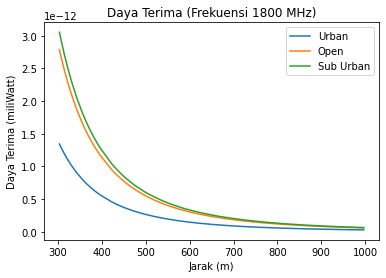

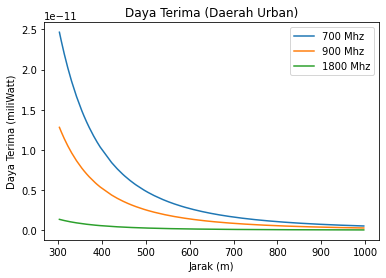

In [9]:
plt.figure(1)
plt.plot(d_sort,Prx_Urban,label='Urban')
plt.plot(d_sort,Prx_Open,label='Open')
plt.plot(d_sort,Prx_Sub,label='Sub Urban')
plt.legend()
plt.title('Daya Terima (Frekuensi 1800 MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

plt.figure(2)
plt.plot(d_sort,Prx_Urban1,label='700 Mhz')
plt.plot(d_sort,Prx_Urban2,label='900 Mhz')
plt.plot(d_sort,Prx_Urban,label='1800 Mhz')
plt.legend()
plt.title('Daya Terima (Daerah Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

Signal To Noise Ratio (SNR)

In [10]:
def noise(Prx_mw,BW):
  #Prx_mw = daya terima (miliWatt)
  #BW = bandwidth sistem (Hz)

  No_log = -174 + 10*np.log10(BW)
  No_num = 10**(No_log/10)
  SNR = Prx_mw/No_num

  return SNR

In [12]:
BW = 5000000

In [13]:
SNR_Urban=noise(Prx_Urban,BW)
SNR_Sub=noise(Prx_Sub,BW)
SNR_Open=noise(Prx_Open,BW)

SNR_Urban1=noise(Prx_Urban1,BW)
SNR_Urban2=noise(Prx_Urban2,BW)

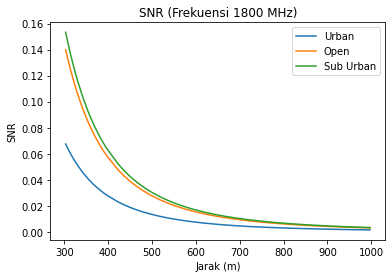

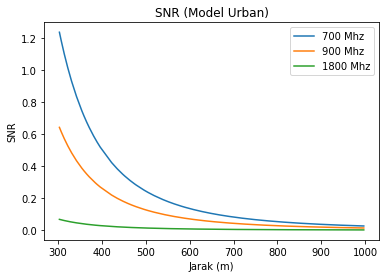

In [14]:
plt.figure(1)
plt.plot(d_sort,SNR_Urban,label='Urban')
plt.plot(d_sort,SNR_Open,label='Open')
plt.plot(d_sort,SNR_Sub,label='Sub Urban')
plt.legend()
plt.title('SNR (Frekuensi 1800 MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

plt.figure(2)
plt.plot(d_sort,SNR_Urban1,label='700 Mhz')
plt.plot(d_sort,SNR_Urban2,label='900 Mhz')
plt.plot(d_sort,SNR_Urban,label='1800 Mhz')
plt.legend()
plt.title('SNR (Model Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

Kapasitas Seluler

In [15]:
def kapasitas(SNR,BW):
  #SNR = Signal to Noise Ratio (numerik)
  #BW = Bandwidth (Hz)

  ks = BW*np.log2(1+SNR)

  return ks

In [16]:
Ks_Urban=kapasitas(SNR_Urban,BW)
Ks_Sub=kapasitas(SNR_Sub,BW)
Ks_Open=kapasitas(SNR_Open,BW)

Ks_Urban1=kapasitas(SNR_Urban1,BW)
Ks_Urban2=kapasitas(SNR_Urban2,BW)

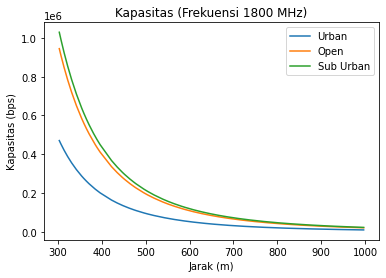

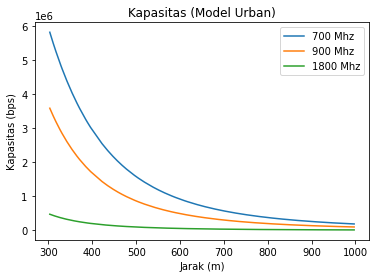

In [17]:
plt.figure(1)
plt.plot(d_sort,Ks_Urban,label='Urban')
plt.plot(d_sort,Ks_Open,label='Open')
plt.plot(d_sort,Ks_Sub,label='Sub Urban')
plt.legend()
plt.title('Kapasitas (Frekuensi 1800 MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

plt.figure(2)
plt.plot(d_sort,Ks_Urban1,label='700 Mhz')
plt.plot(d_sort,Ks_Urban2,label='900 Mhz')
plt.plot(d_sort,Ks_Urban,label='1800 Mhz')
plt.legend()
plt.title('Kapasitas (Model Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()